In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [80]:
gap = pd.read_csv('datasets/gapminder.csv')
gap.head()

,Unnamed: 0,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,Life expectancy
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abkhazia
1,1,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,28.13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Afghanistan
2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Akrotiri and Dhekelia
3,3,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Albania
4,4,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Algeria


In [81]:
gap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Columns: 219 entries, Unnamed: 0 to Life expectancy
dtypes: float64(217), int64(1), object(1)
memory usage: 1.3+ MB


In [82]:
gap.describe()

,Unnamed: 0,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
count,780.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.00000,208.000000
mean,129.500000,31.486020,31.448905,31.463483,31.377413,31.446318,31.562537,31.615970,31.573134,31.376766,...,70.139712,70.447163,70.767740,70.969904,71.324375,71.663077,71.916106,72.088125,72.32101,72.556635
std,75.103138,3.763585,3.755739,3.878204,3.901966,3.877156,3.947957,4.039261,3.917339,4.017228,...,8.953255,8.800452,8.610341,8.898859,8.376540,8.217466,8.120852,8.074990,7.90202,7.738535
min,0.000000,23.390000,23.390000,23.390000,19.600000,23.390000,23.390000,23.390000,23.390000,12.480000,...,43.300000,44.500000,45.500000,32.200000,46.700000,46.100000,45.600000,45.400000,47.10000,48.860000
25%,64.750000,29.000000,28.950000,28.900000,28.900000,28.950000,29.000000,29.000000,29.000000,28.950000,...,64.825000,64.875000,65.225000,65.475000,65.600000,66.075000,66.475000,66.775000,67.05000,67.175000
50%,129.500000,31.800000,31.700000,31.600000,31.500000,31.600000,31.700000,31.800000,31.800000,31.600000,...,72.750000,73.000000,73.350000,73.700000,73.750000,74.050000,74.150000,74.300000,74.40000,74.500000
75%,194.250000,33.900000,33.900000,33.900000,33.800000,33.870000,33.900000,34.000000,34.000000,33.870000,...,76.925000,77.150000,77.425000,77.650000,77.825000,78.125000,78.300000,78.400000,78.50000,78.650000
max,259.000000,42.850000,40.300000,44.370000,44.840000,42.830000,44.270000,45.820000,43.560000,43.550000,...,84.500000,84.600000,84.600000,84.700000,84.700000,84.700000,84.800000,84.800000,84.80000,84.800000


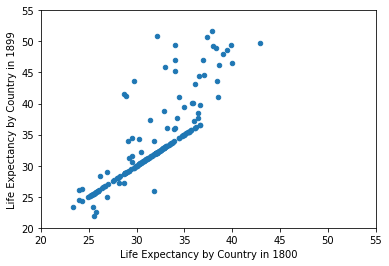

In [83]:
gap.plot(kind='scatter', x='1800', y='1899')
plt.xlabel('Life Expectancy by Country in 1800')
plt.ylabel('Life Expectancy by Country in 1899')
plt.xlim(20, 55)
plt.ylim(20, 55)
plt.show()

In [84]:
def f(x):
    a = x.dropna()
    n = pd.to_numeric(a)
    ge0 = n >= 0
    return ge0

In [85]:
gap_melt = pd.melt(frame=gap, id_vars='Life expectancy')
gap_melt.head()

,Life expectancy,variable,value
0,Abkhazia,Unnamed: 0,0.0
1,Afghanistan,Unnamed: 0,1.0
2,Akrotiri and Dhekelia,Unnamed: 0,2.0
3,Albania,Unnamed: 0,3.0
4,Algeria,Unnamed: 0,4.0


In [101]:
gap_melt.columns = ['country', 'year', 'life_expectancy' ]
gap_melt.head()

,country,year,life_expectancy
781,Afghanistan,1800.0,28.21
783,Albania,1800.0,35.40
784,Algeria,1800.0,28.82
787,Angola,1800.0,26.98
789,Antigua and Barbuda,1800.0,33.54


In [102]:
gap_melt['year'] = pd.to_numeric(gap_melt['year'], errors='coerce')
gap_melt.tail()

,country,year,life_expectancy
170031,Virgin Islands (U.S.),2016.0,80.82
170034,Yemen,2016.0,64.92
170036,Zambia,2016.0,57.10
170037,Zimbabwe,2016.0,61.69
170039,South Sudan,2016.0,56.10


In [103]:
assert gap_melt.year.dtypes == np.int64

AssertionError: 

In [104]:
countries = gap_melt.country
countries.tail()

170031    Virgin Islands (U.S.)
170034                    Yemen
170036                   Zambia
170037                 Zimbabwe
170039              South Sudan
Name: country, dtype: object

In [105]:
countries = countries.drop_duplicates()
countries.tail()

149301                    Dominica
149379            Marshall Islands
149408    Northern Mariana Islands
154958                       Åland
162207                     Tokelau
Name: country, dtype: object

In [106]:
# 1) Anchor the pattern to match exactly what you want by placing a ^ in the beginning and $ in the end.
# 2) Use A-Za-z to match the set of lower and upper case letters, \. to match periods, and \s to match whitespace 
# between words.
# 3) Use str.contains() to create a Boolean vector representing values that match the pattern.

In [107]:
mask = countries.str.contains('^[A-Za-z.\s]*$')
mask_inverse = ~mask
invalid = countries.loc[mask_inverse]
invalid

829            Congo, Dem. Rep.
830                 Congo, Rep.
833               Cote d'Ivoire
873               Guinea-Bissau
878            Hong Kong, China
911                Macao, China
912              Macedonia, FYR
925       Micronesia, Fed. Sts.
1005                Timor-Leste
1031      Virgin Islands (U.S.)
154958                    Åland
Name: country, dtype: object

In [108]:
gap_melt.shape

(43857, 3)

In [109]:
gap_melt.head()

,country,year,life_expectancy
781,Afghanistan,1800.0,28.21
783,Albania,1800.0,35.40
784,Algeria,1800.0,28.82
787,Angola,1800.0,26.98
789,Antigua and Barbuda,1800.0,33.54


In [110]:
gap_melt = gap_melt.dropna()
gap_melt.shape

(43857, 3)

In [125]:
gap_melt.head()

,country,year,life_expectancy
781,Afghanistan,1800.0,28.21
783,Albania,1800.0,35.40
784,Algeria,1800.0,28.82
787,Angola,1800.0,26.98
789,Antigua and Barbuda,1800.0,33.54


In [126]:
gap_agg = gap_melt.groupby('year')['life_expectancy'].mean()
gap_agg.head()

year
1800.0    31.486020
1801.0    31.448905
1802.0    31.463483
1803.0    31.377413
1804.0    31.446318
Name: life_expectancy, dtype: float64

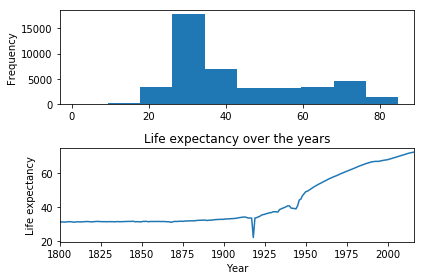

In [128]:
plt.subplot(2,1,1)
gap_melt.life_expectancy.plot(kind='hist')

plt.subplot(2,1,2)
gap_agg.plot()
plt.xlabel('Year')
plt.ylabel('Life expectancy')
plt.title('Life expectancy over the years')

plt.tight_layout()
plt.show()

In [131]:
gap_melt.to_csv('datasets/gapminder1.csv')
gap_agg.to_csv('datasets/gap_agg.csv')

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  
